In [3]:
import os

def count_lines(file_path):
    with open(file_path) as file_in:
        lines = []
        for line in file_in:
            lines.append(line)
    return len(lines)                      

def count_GJ_txt_files(directory):
    count = 0

    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                count += 1
                file_path = os.path.join(root, file)
                n = count_lines(file_path)
                print(file_path, ', ', n)                

    return count

folder_A_path = "D:/Research/GJ DL/4 - New Annotations" 
number_of_GJ_txt_files = count_GJ_txt_files(folder_A_path)

print(f"Number of GJ.txt files: {number_of_GJ_txt_files}")


D:/Research/GJ DL/4 - New Annotations\PW01082018LR.mp4\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW01092017DC.mp4\GJ.txt ,  7
D:/Research/GJ DL/4 - New Annotations\PW01142020JE.mpg\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW01182018MP.mp4\GJ.txt ,  5
D:/Research/GJ DL/4 - New Annotations\PW01232018JH.mp4\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW01282020JM.mpg\GJ.txt ,  7
D:/Research/GJ DL/4 - New Annotations\PW02012018TL.mp4\GJ.txt ,  5
D:/Research/GJ DL/4 - New Annotations\PW02062018PA.mp4\GJ.txt ,  7
D:/Research/GJ DL/4 - New Annotations\PW02082018Ck.mp4\GJ.txt ,  5
D:/Research/GJ DL/4 - New Annotations\PW02092021CL.mpg\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW02132018RP.mp4\GJ.txt ,  5
D:/Research/GJ DL/4 - New Annotations\PW02202021YK.mpg\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW03042019CW.mpg\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW03092021PF.mpg\GJ.txt ,  6
D:/Research/GJ DL/4 - New Annotations\PW03132018JG.mp4\GJ.txt 

Number of GJ.txt files: 45


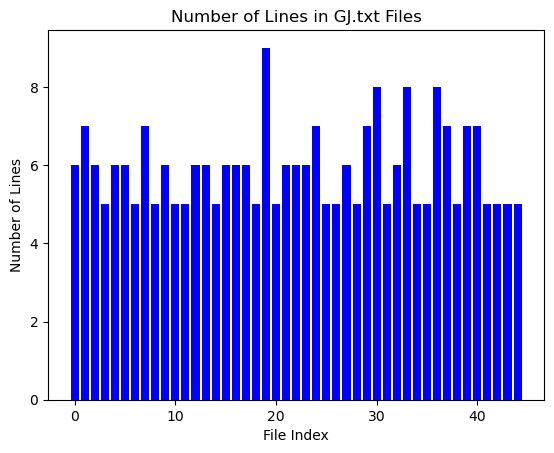

In [34]:
import os
import matplotlib.pyplot as plt

def count_lines(file_path):
    with open(file_path) as file_in:
        lines = [line for line in file_in]
    return len(lines)

def count_GJ_txt_files(directory):
    count = 0
    line_counts = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                count += 1
                file_path = os.path.join(root, file)
                n = count_lines(file_path)
                line_counts.append(n)
                # print(file_path, ', ', n)

    return count, line_counts

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
number_of_GJ_txt_files, line_counts = count_GJ_txt_files(folder_A_path)

print(f"Number of GJ.txt files: {number_of_GJ_txt_files}")

# Plotting
plt.bar(range(len(line_counts)), line_counts, color='blue')
plt.title('Number of Lines in GJ.txt Files')
plt.xlabel('File Index')
plt.ylabel('Number of Lines')
plt.show()


Number of GJ.txt files: 45


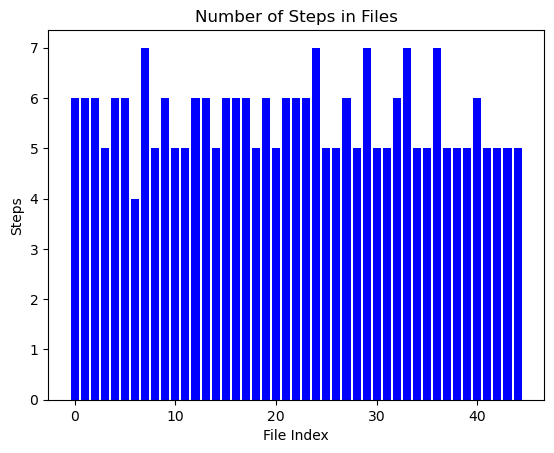


Unique Task Names:
1.1	Stay suture
1.2	Inner running suture
1.3	Enterotomy
2.1	Inner stay suture
2.2	Inner running suture
3.1	Inner Layer of Connell
4.1	Outer layer of Connell


c:\Users\s229769\.conda\envs\myenv_ana\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


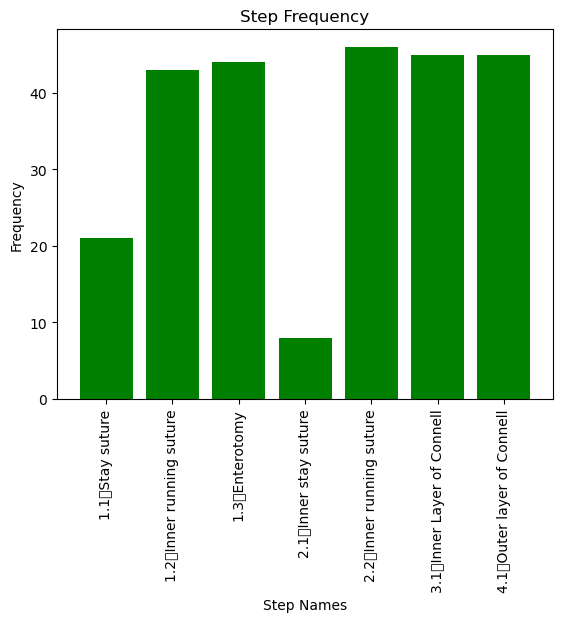

In [47]:
import os
import re
import matplotlib.pyplot as plt

def extract_task_name(line):
    return line.split(':')[0].strip()

def count_lines(file_path):
    with open(file_path) as file_in:
        lines = [line for line in file_in]
    return len(lines)

def count_GJ_txt_files(directory):
    count = 0
    line_counts = []
    task_frequency = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                count += 1
                file_path = os.path.join(root, file)
                n = count_lines(file_path)
                line_counts.append(n)

                with open(file_path) as task_file:
                    for task_line in task_file:
                        task_name = extract_task_name(task_line)
                        task_frequency[task_name] = task_frequency.get(task_name, 0) + 1

                # print(file_path, ', ', n)

    return count, line_counts, task_frequency

def display_sorted_task_names(unique_task_names):
    sorted_task_names = sorted(unique_task_names, key=lambda x: re.search(r'\d+\.\d+', x).group(0))
    print("\nUnique Task Names:")
    for task_name in sorted_task_names:
        print(task_name)

def plot_task_frequency(task_frequency):
    task_names, frequencies = zip(*sorted(task_frequency.items(), key=lambda x: re.search(r'\d+\.\d+', x[0]).group(0)))

    plt.bar(range(len(task_names)), frequencies, color='green')
    plt.title('Step Frequency')
    plt.xlabel('Step Names')
    plt.ylabel('Frequency')
    plt.xticks(range(len(task_names)), task_names, rotation='vertical')
    plt.show()

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
number_of_GJ_txt_files, line_counts, task_frequency = count_GJ_txt_files(folder_A_path)

print(f"Number of GJ.txt files: {number_of_GJ_txt_files}")

plt.bar(range(len(line_counts)), line_counts, color='blue')
plt.title('Number of Steps in Files')
plt.xlabel('File Index')
plt.ylabel('Steps')
plt.show()

display_sorted_task_names(task_frequency)

plot_task_frequency(task_frequency)


In [28]:
for t in ["task"]:
    print(t)
    task_names = [
        task.split("#")[0].split("\n")[0].rstrip()
        for task in open("GJ_steps.txt", "r").readlines()
    ]
    print(task_names)

    tasks_dic = dict(zip(task_names, list(range(1, len(task_names) + 1))))
    tasks_dic["nothing"] = 0
    print(tasks_dic)

task
['1.1 Anterior Mattress Suture', '1.2 Bleeding control event', '1.3 New Instrument/Suture', '1.4 Anterior Mattress Suture', '1.5 Bleeding control event', '1.6 New Instrument/Suture', '1.7 Anterior Mattress Suture', '1.11 Tying Mattress', '1.11 Tying Mattress Suture', '1.12 Tying Mattress', '1.12 Tying Mattress Suture', '1.13 Tying Mattress', '1.13 Tying Mattress Suture', '2.1 Checking patency of duct with stent', '2.2 Enterotomy', '3.1 Posterior duct sutures', '3.2 Bleeding control event', '3.4 Anterior duct sutures', '3.7 Running duct sutures', '4.1 Anterior Buttress Suture', '4.3 New Instrument/Suture', '4.4 Anterior Buttress Suture', '4.5 Bleeding control event', '4.6 New Instrument/Suture', '4.7 Anterior Buttress Suture', '4.9 New Instrument/Suture']
{'1.1 Anterior Mattress Suture': 1, '1.2 Bleeding control event': 2, '1.3 New Instrument/Suture': 3, '1.4 Anterior Mattress Suture': 4, '1.5 Bleeding control event': 5, '1.6 New Instrument/Suture': 6, '1.7 Anterior Mattress Suture

In [13]:
for task in open("D:/Research/Phong/GJ_Project_Copy/GJ/GJ_steps.txt", "r").readlines():
    print(task)

1.1 Anterior Mattress Suture

1.2 Bleeding control event 

1.3 New Instrument/Suture 

1.4 Anterior Mattress Suture 

1.5 Bleeding control event 

1.6 New Instrument/Suture 

1.7 Anterior Mattress Suture

1.11 Tying Mattress

1.11 Tying Mattress Suture

1.12 Tying Mattress

1.12 Tying Mattress Suture

1.13 Tying Mattress

1.13 Tying Mattress Suture

2.1 Checking patency of duct with stent 

2.2 Enterotomy 

3.1 Posterior duct sutures 

3.2 Bleeding control event 

3.4 Anterior duct sutures 

3.7 Running duct sutures 

4.1 Anterior Buttress Suture 

4.3 New Instrument/Suture 

4.4 Anterior Buttress Suture 

4.5 Bleeding control event 

4.6 New Instrument/Suture 

4.7 Anterior Buttress Suture 

4.9 New Instrument/Suture 


In [40]:
#Find duplicates
import os

def find_files_with_sequence(directory, sequence):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                file_path = os.path.join(root, file)
                if has_sequence(file_path, sequence):
                    print(f"Sequence found in {file_path}")

def has_sequence(file_path, sequence):
    with open(file_path) as file_in:
        lines = file_in.readlines()
        sequence_found = False

        for line in lines:
            if sequence[0] in line:
                index = lines.index(line)
                if all(sequence[i] in lines[index + i] for i in range(1, len(sequence))):
                    sequence_found = True
                    break

        return sequence_found

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
sequence_to_find = [
    "1.2\tInner running suture",
    "1.3\tEnterotomy",
    "2.2\tInner running suture",
    "3.1\tInner Layer of Connell",
    "4.1\tOuter layer of Connell"
]

find_files_with_sequence(folder_A_path, sequence_to_find)


Sequence found in D:/Research/GJ DL/4 - New Annotations\PW01082018LR.mp4\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW01142020JE.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW01182018MP.mp4\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW01232018JH.mp4\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW01282020JM.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW02082018Ck.mp4\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW02092021CL.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW02132018RP.mp4\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW03042019CW.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW03092021PF.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW03272021NH.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - New Annotations\PW04142020FC.mpg\GJ.txt
Sequence found in D:/Research/GJ DL/4 - 

In [43]:
import os

def find_files_with_consecutive_task(directory, task):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                file_path = os.path.join(root, file)
                if has_consecutive_task(file_path, task):
                    print(f"Consecutive task found in {file_path}")

def has_consecutive_task(file_path, task):
    with open(file_path) as file_in:
        lines = file_in.readlines()

        for i in range(len(lines) - 1):
            current_line = lines[i].strip()
            next_line = lines[i + 1].strip()

            if task in current_line and task in next_line:
                return True

        return False

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
task_to_find = "Enterotomy"
find_files_with_consecutive_task(folder_A_path, task_to_find)


Consecutive task found in D:/Research/GJ DL/4 - New Annotations\PW01092017DC.mp4\GJ.txt
Consecutive task found in D:/Research/GJ DL/4 - New Annotations\PW02012018TL.mp4\GJ.txt


In [45]:
import os

def find_files_with_consecutive_tasks(directory, tasks):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                file_path = os.path.join(root, file)
                if has_consecutive_tasks(file_path, tasks):
                    print(f"Consecutive tasks found in {file_path}")

def has_consecutive_tasks(file_path, tasks):
    with open(file_path) as file_in:
        lines = file_in.readlines()

        for i in range(len(lines) - 1):
            current_line = lines[i].strip()
            next_line = lines[i + 1].strip()

            # Check if the current and next lines contain any of the specified tasks
            if any(task in current_line and task in next_line for task in tasks):
                return True

        return False

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
tasks_to_find = [
    "1.2\tInner running suture",
    "1.3\tEnterotomy",
    "2.2\tInner running suture",
    "3.1\tInner Layer of Connell",
    "4.1\tOuter layer of Connell"
]

find_files_with_consecutive_tasks(folder_A_path, tasks_to_find)


Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW04272017TB.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW09072017JO.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW09122017DT.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW09262017PS.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW10052017WS.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW10312017FS.mp4\GJ.txt
Consecutive tasks found in D:/Research/GJ DL/4 - New Annotations\PW11102017RF.mp4\GJ.txt


In [46]:
import os

def find_files_with_consecutive_tasks(directory, tasks):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if not file.startswith('.') and file.endswith("GJ.txt"):
                file_path = os.path.join(root, file)
                if has_consecutive_tasks(file_path, tasks):
                    print(f"Consecutive tasks found in {file_path}")

def has_consecutive_tasks(file_path, tasks):
    with open(file_path) as file_in:
        lines = file_in.readlines()

        for i in range(len(lines) - 1):
            current_line = lines[i].strip()
            next_line = lines[i + 1].strip()

            # Check if the current and next lines contain any of the specified tasks
            if any(task in current_line and task in next_line for task in tasks):
                return True

        return False

folder_A_path = "D:/Research/GJ DL/4 - New Annotations"
tasks_to_find = [
    "1.2\tInner running suture",
    "1.3\tEnterotomy",
    "2.2\tInner running suture",
    "3.1\tInner Layer of Connell",
    "4.1\tOuter layer of Connell"
]

find_files_with_consecutive_tasks(folder_A_path, tasks_to_find)
